In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\barkha arora\\OneDrive\\Desktop\\python\\ml\\nutrition ml\\dataset.csv")


In [4]:
d=data.head()

In [5]:
print(d)

   Unnamed: 0            name   servin _size  calories  total_fat   
0           0       Cornstarch           100       381        0.1  \
1           1     Nuts, pecans           100       691       72.0   
2           2    Eggplant, raw           100        25        0.2   
3           3   Teff, uncooked           100       367        2.4   
4           4  Sherbet, orange           100       144        2.0   

   saturated_fat  cholesterol  vitamin_a  vitamin_a_rae  vitamin_b12   
0            NaN            0          0              0         0.00  \
1            6.2            0         56              3         0.00   
2            NaN            0         23              1         0.00   
3            0.4            0          9              0         0.00   
4            1.2            1         46             12         0.13   

   vitamin_b6  vitamin_c  vitamin_e  tocopherol_alpha  vitamin_k   
0       0.000        0.0       0.00              0.00        0.0  \
1       0.210   

In [6]:
data_final=data.dropna().copy()
data_final=data_final.drop('name ',axis=1)

In [7]:
sugar=20
calories=300
totalfat=7
carbohydrates=60  #since our data doesnt have a "healthy" column we will make a dummy column by putting restrictions on the amout of some nutrients

In [8]:
data_final['healthy']=(data_final['sugars']<sugar) & (data_final['calories']<calories) & (data_final['carbohydrate']<carbohydrates) & (data_final['fat']<totalfat)
data_final['healthy']=data_final['healthy'].astype(int)

In [9]:
t=data_final.columns.to_list()
print(t)

['Unnamed: 0', 'servin _size', 'calories', 'total_fat', 'saturated_fat', 'cholesterol', 'vitamin_a', 'vitamin_a_rae', 'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_e', 'tocopherol_alpha', 'vitamin_k', 'carbohydrate', 'fiber', 'sugars', 'fat', 'healthy']


In [10]:
#a column named healthy has been added
print(data_final.describe())

       Unnamed: 0  servin _size    calories  total_fat  saturated_fat   
count  734.000000         734.0  734.000000  734.00000     734.000000  \
mean   501.130790         100.0  290.448229   15.91267       5.217711   
std    291.604868           0.0  205.292330   24.16199      10.101391   
min      1.000000         100.0   15.000000    0.10000       0.100000   
25%    244.250000         100.0  131.250000    1.70000       0.300000   
50%    501.500000         100.0  275.500000    6.60000       1.600000   
75%    752.750000         100.0  374.000000   19.00000       5.000000   
max    998.000000         100.0  902.000000  100.00000      90.000000   

       cholesterol      vitamin_a  vitamin_a_rae  vitamin_b12  vitamin_b6   
count   734.000000     734.000000      734.00000   734.000000  734.000000  \
mean     43.339237    1168.967302      155.00000     0.867738    0.245098   
std     140.738912    6099.550132     1234.81487     2.888603    0.409110   
min       0.000000       0.000000 

In [11]:
print(data_final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 1 to 998
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        734 non-null    int64  
 1   servin _size      734 non-null    int64  
 2   calories          734 non-null    int64  
 3   total_fat         734 non-null    float64
 4   saturated_fat     734 non-null    float64
 5   cholesterol       734 non-null    int64  
 6   vitamin_a         734 non-null    int64  
 7   vitamin_a_rae     734 non-null    int64  
 8   vitamin_b12       734 non-null    float64
 9   vitamin_b6        734 non-null    float64
 10  vitamin_c         734 non-null    float64
 11  vitamin_e         734 non-null    float64
 12  tocopherol_alpha  734 non-null    float64
 13  vitamin_k         734 non-null    float64
 14  carbohydrate      734 non-null    float64
 15  fiber             734 non-null    float64
 16  sugars            734 non-null    float64
 17  fa

In [12]:
sum1=data_final.isnull().sum()
print(sum1)  #cross checking if there are any null values left

Unnamed: 0          0
servin _size        0
calories            0
total_fat           0
saturated_fat       0
cholesterol         0
vitamin_a           0
vitamin_a_rae       0
vitamin_b12         0
vitamin_b6          0
vitamin_c           0
vitamin_e           0
tocopherol_alpha    0
vitamin_k           0
carbohydrate        0
fiber               0
sugars              0
fat                 0
healthy             0
dtype: int64


     Unnamed: 0  servin _size  calories  total_fat  saturated_fat   
1             1           100       691       72.0            6.2  \
3             3           100       367        2.4            0.4   
4             4           100       144        2.0            1.2   
5             5           100        25        0.3            0.1   
6             6           100        42        0.7            0.2   
..          ...           ...       ...        ...            ...   
994         994           100       122        2.4            0.9   
995         995           100       130        0.6            0.1   
996         996           100       301       26.0           10.0   
997         997           100       110        2.5            0.6   
998         998           100       401       14.0            3.5   

     cholesterol  vitamin_a  vitamin_a_rae  vitamin_b12  vitamin_b6   
1              0         56              3         0.00       0.210  \
3              0          9  

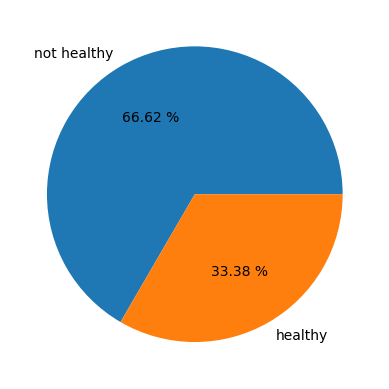

In [13]:
#visual representation of healthy column
plt.pie(data_final['healthy'].value_counts(),labels=['not healthy','healthy'],autopct = '%0.2f %%')
print(data_final)

In [14]:
print(data_final.corr()["healthy"].abs().sort_values(ascending=False))

healthy             1.000000
calories            0.626973
total_fat           0.401486
fat                 0.401393
carbohydrate        0.355492
saturated_fat       0.321334
sugars              0.203836
fiber               0.148129
vitamin_e           0.115882
tocopherol_alpha    0.115882
vitamin_c           0.111294
vitamin_b12         0.104263
vitamin_k           0.091267
cholesterol         0.088867
vitamin_b6          0.055785
vitamin_a           0.017480
vitamin_a_rae       0.014230
Unnamed: 0          0.002210
servin _size             NaN
Name: healthy, dtype: float64


In [15]:
#this shows that almost all of the values are more or less related to the healthy column other than the last 5 columns
data_final=data_final.drop('servin_size',axis=1)

KeyError: "['servin_size'] not found in axis"

In [16]:
data_final=data_final.drop('servin_size',axis=2)

ValueError: No axis named 2 for object type DataFrame

In [17]:
data_final.drop('servin _size',axis=1)

,Unnamed: 0,calories,total_fat,saturated_fat,cholesterol,vitamin_a,vitamin_a_rae,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,tocopherol_alpha,vitamin_k,carbohydrate,fiber,sugars,fat,healthy
1,1,691,72.0,6.2,0,56,3,0.00,0.210,1.1,1.40,1.40,3.5,13.86,9.6,3.97,71.97,0
3,3,367,2.4,0.4,0,9,0,0.00,0.482,0.0,0.08,0.08,1.9,73.13,8.0,1.84,2.38,0
4,4,144,2.0,1.2,1,46,12,0.13,0.023,2.3,0.01,0.01,0.0,30.40,1.3,24.32,2.00,0
5,5,25,0.3,0.1,0,0,0,0.00,0.184,48.2,0.08,0.08,15.5,4.97,2.0,1.91,0.28,1
6,6,42,0.7,0.2,0,4825,241,0.00,0.146,52.0,2.02,2.02,108.6,6.70,3.7,3.01,0.74,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,122,2.4,0.9,22,0,0,0.38,0.231,0.6,0.00,0.00,0.0,7.27,0.0,0.00,2.37,1
995,995,130,0.6,0.1,0,152,8,0.00,0.096,0.0,0.00,0.00,0.0,26.15,0.0,0.00,0.63,1
996,996,301,26.0,10.0,93,256,15,0.86,0.378,3.2,0.38,0.38,70.2,2.95,1.0,1.33,25.87,0
997,997,110,2.5,0.6,63,41,12,0.37,0.470,1.7,0.00,0.00,0.0,0.00,0.0,0.00,2.47,1


In [18]:
print(data_final.corr()["healthy"].abs().sort_values(ascending=False))


healthy             1.000000
calories            0.626973
total_fat           0.401486
fat                 0.401393
carbohydrate        0.355492
saturated_fat       0.321334
sugars              0.203836
fiber               0.148129
vitamin_e           0.115882
tocopherol_alpha    0.115882
vitamin_c           0.111294
vitamin_b12         0.104263
vitamin_k           0.091267
cholesterol         0.088867
vitamin_b6          0.055785
vitamin_a           0.017480
vitamin_a_rae       0.014230
Unnamed: 0          0.002210
servin _size             NaN
Name: healthy, dtype: float64


In [19]:
sns.barplot

KeyError: 0

In [20]:
y = data_final["healthy"]
sns.barplot(data_final['calories'],y)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

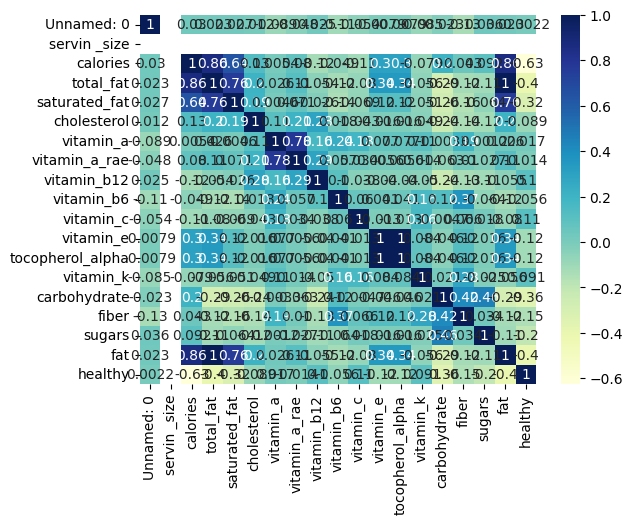

In [21]:
sns.heatmap(data_final.corr(),annot=True,cmap='YlGnBu')
plt.show()

<Axes: xlabel='calories', ylabel='Count'>

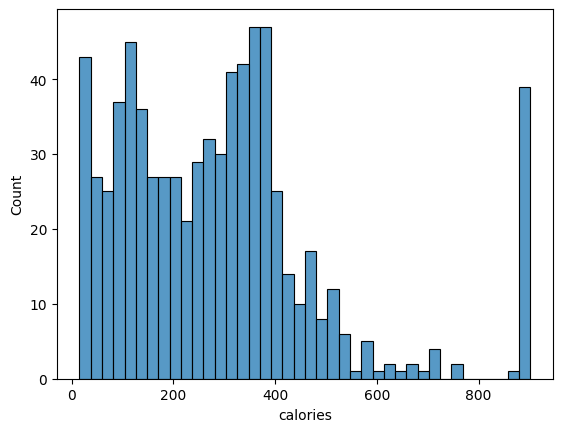

In [22]:
sns.histplot(data_final['calories'],kde=False,bins=40)

<Axes: xlabel='sugars', ylabel='Count'>

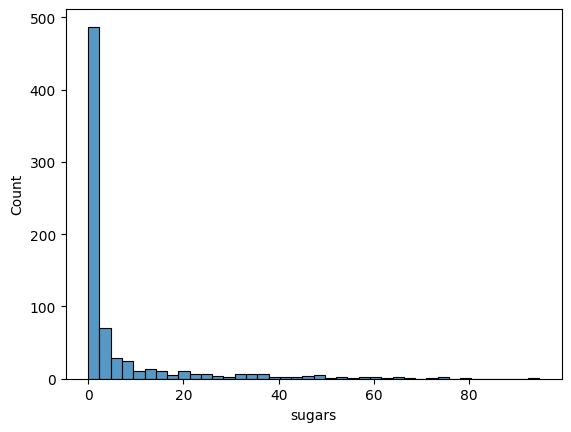

In [23]:
sns.histplot(data_final['sugars'],kde=False,bins=40)

<Axes: xlabel='fat', ylabel='Count'>

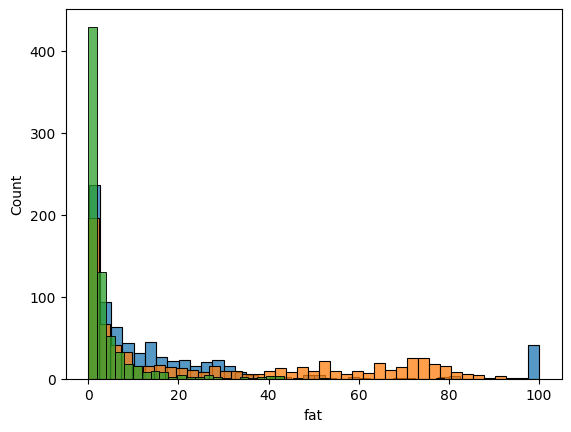

In [24]:
sns.histplot(data_final['fat'],kde=False,bins=40)
sns.histplot(data_final['carbohydrate'],kde=False,bins=40)
sns.histplot(data_final['fiber'],kde=False,bins=40)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier


In [26]:
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [27]:
scaler = MinMaxScaler()
value=pd.DataFrame(scaler.fit_transform(data_final),columns=data_final.columns,index=data_final.index)
x=value[['total_fat','carbohydrate', 'fiber', 'sugars', 'fat']]
y=value['healthy']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [29]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [30]:

from sklearn import metrics
t=metrics.mean_squared_error(y_test, predictions)
print(t)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(rmse)
print(r2)


NameError: name 'predictions' is not defined

In [31]:
predictions = model.predict(x_test)

In [32]:

from sklearn import metrics
t=metrics.mean_squared_error(y_test, predictions)
print(t)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(rmse)
print(r2)


0.01809954751131222


NameError: name 'r2_score' is not defined

In [33]:
from sklearn.metrics import r2_score

In [34]:
from sklearn import metrics
t=metrics.mean_squared_error(y_test, predictions)
print(t)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(rmse)
print(r2)


0.01809954751131222
0.1345345587992625
0.9135874877810362
